# Time Series Forecasting on Air Passengers Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
data=pd.read_csv('AirPassengers.csv',index_col=0,parse_dates=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Text(0, 0.5, '# of Passengers')

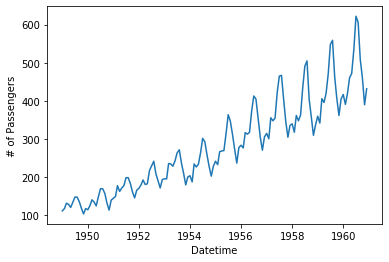

In [11]:
plt.plot(data)
plt.xlabel('Datetime')
plt.ylabel('# of Passengers')

In [12]:
#Performing Rolling Statistics to check the stationarity of the data
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

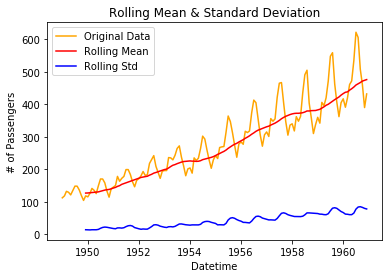

In [13]:
orig=plt.plot(data,c='orange',label='Original Data')
mean=plt.plot(rolmean,c='red',label='Rolling Mean')
std=plt.plot(rolstd,c='blue',label='Rolling Std')
plt.xlabel('Datetime')
plt.legend()
plt.ylabel('# of Passengers')
plt.title('Rolling Mean & Standard Deviation')

In [14]:
#Performing Dickey-Fuller test to check the stationarity of the data
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(data['#Passengers'],autolag='AIC')
dftest

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

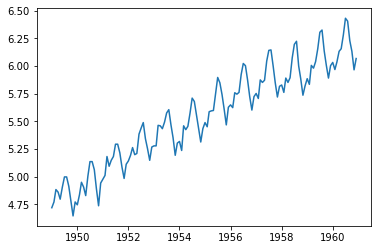

In [15]:
#Estimating Trend
data_logscale=np.log(data)
plt.plot(data_logscale)

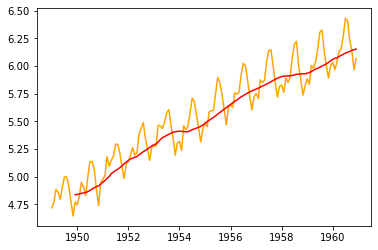

In [18]:
movingaverage=data_logscale.rolling(window=12).mean()
movingstd=data_logscale.rolling(window=12).std()
plt.plot(data_logscale,c='orange')
plt.plot(movingaverage,c='red')


In [20]:
data_logscaleminusmovingaverage=data_logscale-movingaverage
data_logscaleminusmovingaverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [23]:
#Removing NaN values
data_logscaleminusmovingaverage.dropna(inplace=True)
data_logscaleminusmovingaverage

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [27]:
#Performing Rolling satistics to see if the data is Stationary after applying above Log Method
movavg=data_logscaleminusmovingaverage.rolling(window=12).mean()
movstd=data_logscaleminusmovingaverage.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

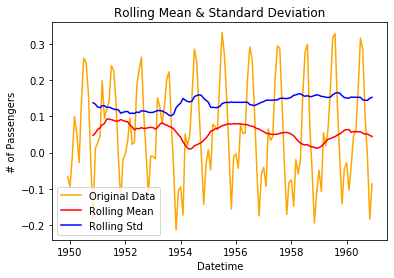

In [28]:
Origin=plt.plot(data_logscaleminusmovingaverage,c='orange',label='Original Data')
Avg=plt.plot(movavg,c='red',label='Rolling Mean')
Std=plt.plot(movstd,c='blue',label='Rolling Std')
plt.xlabel('Datetime')
plt.legend()
plt.ylabel('# of Passengers')
plt.title('Rolling Mean & Standard Deviation')

In [30]:
#Performing Dickey Fuller to see if the data is Stationary after applying above Log Method
from statsmodels.tsa.stattools import adfuller
dfoutput=adfuller(data_logscaleminusmovingaverage['#Passengers'],autolag='AIC')
dfoutput

(-3.162907991300858,
 0.022234630001243844,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

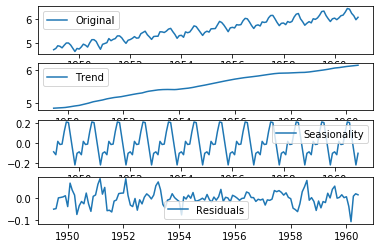

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(data_logscale,label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal,label='Seasionality')
plt.legend()
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend()

In [32]:
#Applying Arima Model
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model=ARIMA(data_logscale , order = (2,1,0))
results_AR = model.fit(disp=-1)

C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [44]:
model=ARIMA(data_logscale , order = (0,1,2))
results_MA = model.fit(disp=-1)

C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
model=ARIMA(data_logscale , order = (2,1,2))
results_ARIMA = model.fit(disp=-1)

C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [47]:
#Convert to Cumulative Sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [49]:
predictions_ARIMA_log=pd.Series(data_logscale['#Passengers'],index=data_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

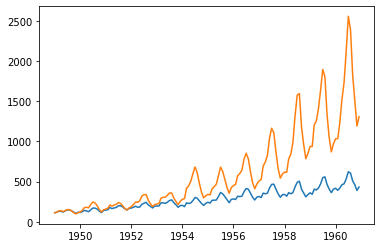

In [50]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

In [51]:
data_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


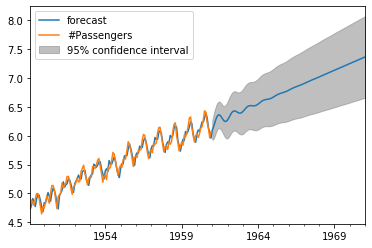

In [55]:
#Predicting the results for next 10 years (12*10=120)
results_ARIMA.plot_predict(1,264)
plt.show()

In [54]:
results_ARIMA.forecast(steps=120)

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91